In [1]:
from models.utils import get_weights_path
from models.vae import VAE
from models.inverse_model import InverseModel
from utils import setup_args
from models.setup import setup_model
from data.utils import setup_env
from data.tr_val_test_splitter import setup_tr_val_test
import torch
from torchvision.utils import make_grid
from matplotlib import pyplot as plt

%matplotlib inline

import gym

if __name__ == "__main__":
    args = setup_args()
    args.test_notebook = False
    args.seed = 7
    args.test_size = 200
    args.mode = "train"
    
    
    args.env_name = "PrivateEye-v0"
    env = setup_env(args)
    pe_bufs = setup_tr_val_test(args)
    
    args.env_name = "originalGame-v0"
    env = setup_env(args)
    pf_bufs = setup_tr_val_test(args)
    
    
#     args.mode = "train"
    
#     args.model_name = "vae"
#     vae = setup_model(args, env)
#     wp = get_weights_path(args,weight_mode="train")
#     vae.encoder.load_state_dict(torch.load(str(wp)))
    
#     args.model_name = "inv_model"
#     inv_model = setup_model(args, env)
#     wp = get_weights_path(args,weight_mode="train")
#     inv_model.encoder.load_state_dict(torch.load(str(wp)))

#     args.model_name = "rand_cnn"
#     rand_cnn = setup_model(args, env)
#     #wp = get_weights_path(args,weight_mode="train")
#     #inv_model.encoder.load_state_dict(torch.load(str(wp)))

def plot(encoder,im):

    fm = list(encoder.children())[0]



    fmaps = fm(im).detach().cpu()

    bfmps = fmaps.reshape(32,1,8,8)

    imgrid = make_grid(bfmps,8,normalize=True, pad_value=0.2).detach().cpu().numpy()

    imgrid.shape

    img = imgrid[0]#imgrid.transpose((1,2,0))
    plt.figure(1)
    plt.clf()
    plt.axis("off")
    plt.imshow(imgrid[0],cmap="jet")
    
    plot_gym_image(im)

def plot_gym_image(im):
        or_im = im.cpu().numpy()[0].transpose(1,2,0)

        new_im = (or_im - or_im.min(axis=(0,1))) / (or_im.max(axis=(0,1)) - or_im.min(axis=(0,1)))
        plt.figure(2)
        plt.clf()
        plt.axis("off")
        plt.imshow(new_im)

pe_ts = pe_bufs[0]
pe_im = pe_ts.sample(1).xs[0,0][None,:]

pf_ts = pf_bufs[0]
pf_im = pf_ts.sample(1).xs[0,0][None,:]

trans = pf_ts.sample(8)

trans.actions

xs = trans.xs.reshape(16,3,128,128)

gr = make_grid(xs,4,normalize=True, pad_value=0.2)

gr.shape

gr = gr.cpu().numpy().transpose(1,2,0)
plt.figure(1, figsize=(100,5))
plt.imshow(gr)



trans.actions

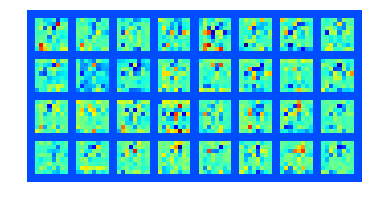

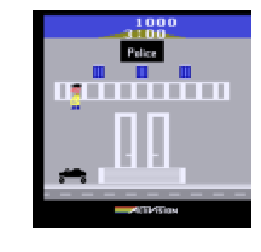

In [62]:
plot(vae.encoder,pe_im)

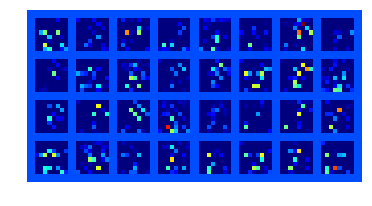

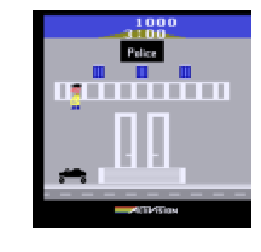

In [63]:
plot(inv_model.encoder,pe_im)

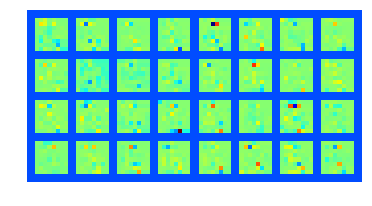

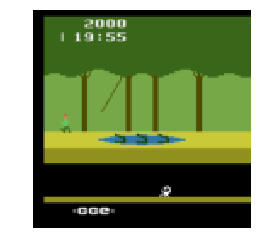

In [64]:
plot(vae.encoder,pf_im)

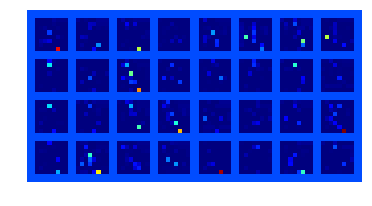

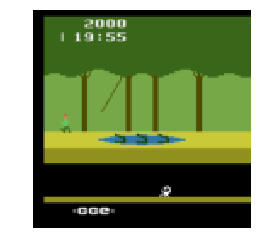

In [65]:
plot(inv_model.encoder,pf_im)

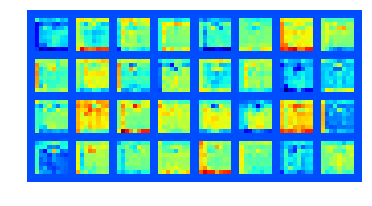

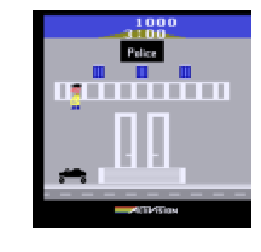

In [66]:
plot(rand_cnn,pe_im)

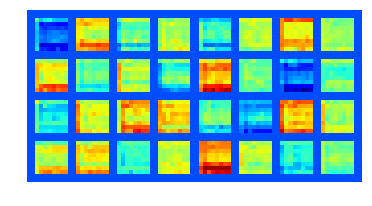

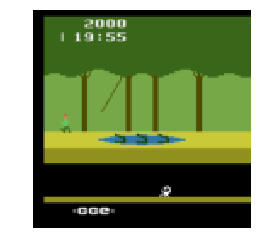

In [67]:
plot(rand_cnn,pf_im)